# Disaggregating Sigma

While keeping the CO2 emissions as is, we disagregate the sigma parameter by introducing Primary Energy. 

In [1]:
import pandas as pd

In [2]:
# Load BP Dataset
bp_dataset = pd.read_excel('bp-stats-review-2022-all-data.xlsx', sheet_name='Primary Energy Consumption', header=2, index_col=0)
bp_dataset.index.name = None

# Select years from base year until today
bp_years = [2005,2015] # bp_years = list(range(2005, 2022, 1))
bp_dataset = bp_dataset[bp_years]

# Drop rows with all NaN 
bp_dataset_clean = bp_dataset.dropna(axis = 0, how = 'all')

In [3]:
# Conver Exajoules (from BP Dataset) to kWh: 1 EJ = 2,778e+11 kWh
bp_dataset_clean = bp_dataset_clean * 2.778e+11

In [4]:
# Aggregating the Primary Energy Data per region

'''
Based on the EIA, a reference from the International Energy Outlook defines regions such as OECD-Europe, Other non-OECD Europe and Eurasia,
Other non-OECD Asia and the Middle East. We will be using these definitions moving forward. Also, Israel is included in OECD Europe for 
statistical reporting purposes (https://www.eia.gov/outlooks/ieo/pdf/IEO2021_ChartLibrary_References.pdf).

For OHI, High Income Countries were based on the European Commission data 
(https://ec.europa.eu/eurostat/web/international-statistical-cooperation/higher-income-countries). Questions about whether Signapore should 
be included in this regional category.
'''

# Aggregates from BP Dataset based on EIO
Latin_America_BP = ['Mexico','Total S. & Cent. America']
OHI_BP = ['Canada','Australia','New Zealand', 'South Korea'] 
OECD_Europe_BP = ['Austria', 'Belgium', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany',
'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel','Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Netherlands', 'Norway', 'Poland',
'Portugal', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom']
Middle_East_BP = ['Iran', 'Iraq', 'Kuwait', 'Oman', 'Qatar', 'Saudi Arabia', 'United Arab Emirates', 
'Other Middle East'] 
Non_OECD_Asia_BP = ['Bangladesh', 'China Hong Kong SAR', 'Indonesia',
'Malaysia', 'Pakistan', 'Philippines', 'Singapore', 'Sri Lanka', 'Taiwan', 'Thailand', 'Vietnam', 'Other Asia Pacific']
Non_Russia_Eurasia_BP = ['Azerbaijan', 'Belarus', 'Bulgaria', 'Croatia', 'Cyprus','Kazakhstan', 'North Macedonia',
'Romania','Turkmenistan', 'Ukraine','Uzbekistan', 'Other CIS']

# Single Country Regions
US_PE = bp_dataset_clean[bp_dataset_clean.index == 'US']
Russia_PE = bp_dataset_clean[bp_dataset_clean.index == 'Russian Federation'].rename(index={'Russian Federation':'Russia'}) 
China_PE = bp_dataset_clean[bp_dataset_clean.index == 'China']
Japan_PE = bp_dataset_clean[bp_dataset_clean.index == 'Japan']
India_PE = bp_dataset_clean[bp_dataset_clean.index == 'India']

# Simple Grouped Regions
Africa_PE = bp_dataset_clean[bp_dataset_clean.index == 'Total Africa'].rename(index = {'Total Africa':'Africa'})

Latin_America_PE = bp_dataset_clean.loc[Latin_America_BP]
Latin_America_PE.loc['Latin America'] = Latin_America_PE.sum()
Latin_America_PE = Latin_America_PE.drop(index = Latin_America_BP)

OHI_PE = bp_dataset_clean.loc[OHI_BP]
OHI_PE.loc['OHI'] = OHI_PE.sum()
OHI_PE = OHI_PE.drop(index = OHI_BP)

# Complex Grouped Regions

OECD_Europe_PE = bp_dataset_clean.loc[OECD_Europe_BP]
OECD_Europe_PE.loc['OECD-Europe'] = OECD_Europe_PE.sum()
OECD_Europe_PE = OECD_Europe_PE.drop(index = OECD_Europe_BP)

Middle_East_PE = bp_dataset_clean.loc[Middle_East_BP] 
Middle_East_PE.loc['Middle East'] = Middle_East_PE.sum()
Middle_East_PE = Middle_East_PE.drop(index = Middle_East_BP)

Non_OECD_Asia_PE = bp_dataset_clean.loc[Non_OECD_Asia_BP] 
Non_OECD_Asia_PE.loc['Other non-OECD Asia'] = Non_OECD_Asia_PE.sum()
Non_OECD_Asia_PE = Non_OECD_Asia_PE.drop(index = Non_OECD_Asia_BP)

Non_Russia_Eurasia_PE = bp_dataset_clean.loc[Non_Russia_Eurasia_BP]
Non_Russia_Eurasia_PE.loc['Non-Russia Eurasia'] = Non_Russia_Eurasia_PE.sum()
Non_Russia_Eurasia_PE = Non_Russia_Eurasia_PE.drop(index = Non_Russia_Eurasia_BP)

In [5]:
# Build one Primary Energy Dataframe
frames = [US_PE, OECD_Europe_PE, Japan_PE, Russia_PE, Non_Russia_Eurasia_PE, China_PE, India_PE, Middle_East_PE, Africa_PE, Latin_America_PE,
OHI_PE, Non_OECD_Asia_PE]

BP_Primary_Energy = pd.concat(frames)

In [10]:
BP_Primary_Energy

,2005,2015
US,2.691229e+13,2.574909e+13
OECD-Europe,2.265892e+13,2.109017e+13
Japan,6.263537e+12,5.296947e+12
Russia,7.504503e+12,7.880732e+12
Non-Russia Eurasia,4.363856e+12,3.988363e+12
China,2.102885e+13,3.528584e+13
India,4.603978e+12,8.030845e+12
Middle East,6.050481e+12,9.380793e+12
Africa,3.799209e+12,5.053468e+12
Latin America,8.245717e+12,1.028078e+13


In [14]:
import sys
sys.path.append("/Users/maryamalki/Desktop/PYRICE_2022")

In [15]:
from model.data_sets import DataSets

In [ ]:
# Get population data_dict for 2005
population2005 = data_sets.RICE_DATA.iloc[19:31, 0].to_numpy()
region_pop = np.zeros((self.n_regions, steps))

# get regional series for factor productivity growth
tfpgr_region = data_sets.RICE_DATA.iloc[52:64, 1:32].to_numpy()

# get initial values for various parameters
initails_par = data_sets.RICE_PARAMETER.iloc[33:40, 5:17].to_numpy()
initials_par = self.initails_par.transpose()

In [ ]:
# Aggregates from CDIA 
Latin_America_CDIAC = ['Mexico','Antigua and Barbuda', 'Argentina', 'Aruba', 'The Bahamas',
'Barbados', 'Belize', 'Bermuda', 'Bolivia', 'British Virgin Islands', 'Cayman Islands', 'Chile', 'Colombia','Costa Rica', 'Cuba', 'Dominica',
'Dominican Republic', 'Ecuador', 'El Salvador', 'Falkland Islands', 'French Guiana', 'Greenland', 'Grenada',
'Guadeloupe', 'Guatemala', 'Guyana', 'Haiti', 'Honduras', 'Jamaica', 'Martinique', 'Mexico','Montserrat', 'Netherlands Antilles',
'Nicaragua', 'Panama', 'Paraguay', 'Peru, St. Kitts and Nevis', 'St. Lucia', 'St. Pierre and Miquelon', 'St.Vincent and the Grenadines', 
'Suriname', 'Trinidad and Tobago', 'Turks and Caicos Islands','Uruguay', 'U.S. Virgin Islands','Venezuela']

OHI_BP = ['Canada','Australia','New Zealand', 'South Korea'] 

OECD_Europe_CDIAC = ['Austria', 'Belgium', 'Czech Republic', 'Denmark', 'Estonia', 'Finland', 'France', 'Germany',
'Greece', 'Hungary', 'Iceland', 'Ireland', 'Israel','Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Netherlands', 'Norway', 'Poland',
'Portugal', 'Slovakia', 'Slovenia', 'Spain', 'Sweden', 'Switzerland', 'Turkey', 'United Kingdom']

Middle_East_CDIAC = ['Bahrain', 'Iran', 'Iraq', 'Jordan', 'Kuwait', 'Lebanon', 'Oman', 'Occupied Palestinian Territories', 'Qatar', 'Saudi Arabia', 
'Syria', 'United Arab Emirates', 'Yemen'] 
 
Non_OECD_Asia_CDIAC = ['Afghanistan', 'Bangladesh', 'Bhutan', 'Brunei', 'Myanmar', 'Cambodia', 'Cook Islands', 'Fiji', 'French Polynesia', 
'Hong Kong', 'Indonesia', 'Kiribati', 'Laos', 'Macau','Malaysia', 'Maldives', 'Mongolia', 'Nauru', 'Nepal', 'New Caledonia', 'Niue', 'Northern Mariana Islands', 
'North Korea', 'Pakistan', 'Papua New Guinea', 'Philippines', 'Samoa', 'Singapore', 'Solomon Islands', 'Sri Lanka',
'Taiwan', 'Thailand', 'Timor-Leste', 'Tonga', 'Vanuatu', 'Vietnam', 'Wake Islands', 'American Samoa', 'Guam']

Non_Russia_Eurasia_CDIAC = ['Albania', 'Armenia', 'Azerbaijan', 'Belarus', 'Bosnia and Herzegovina',
'Bulgaria', 'Croatia', 'Cyprus', 'Faroe Islands', 'Georgia', 'Gibraltar', 'Kazakhstan', 'Kosovo', 'North Macedonia', 'Malta',
'Moldova', 'Montenegro', 'Romania', 'Russia', 'Serbia', 'Tajikistan', 'Turkmenistan', 'Ukraine', 'Uzbekistan']

Africa_CDIAC = ['Algeria', 'Angola', 'Benin', 'Botswana', 'Burkina Faso', 'Burundi', 'Cameroon', 'Cape Verde', 'Central African Republic',
'Chad', 'Comoros', 'Congo', 'Democratic Republic of Congo', "Côte d’Ivoire", 'Djibouti', 'Egypt',
"Equatorial Guinea","Eritrea"," Eswatini"," Ethiopia"," Gabon"," The Gambia"," Ghana"," Kenya"," Lesotho"," Liberia",
"Libya"," Madagascar"," Malawi"," Mali"," Mauritania"," Mauritius"," Morocco"," Mozambique"," Namibia"," Niger"," Nigeria",
"Reunion"," Rwanda"," Sao Tome and Principe"," Senegal"," Seychelles"," Sierra Leone"," Somalia"," South Africa",
"South Sudan"," St. Helena"," Sudan"," Tanzania"," Togo"," Tunisia"," Uganda"," Western Sahara"," Zambia","Zimbabwe"]


In [1]:
%pwd

'/Users/maryamalki/Desktop/PyRICE_2022/new_data'

In [90]:
CDIAC = pd.read_excel('CDIAC.xlsx')

In [92]:
CDIAC = CDIAC.drop(index = [0,1,2])

In [93]:
CDIAC

,Nation,Year,Total CO2 emissions from fossil-fuels and cement production (thousand metric tons of C),Emissions from solid fuel consumption,Emissions from liquid fuel consumption,Emissions from gas fuel consumption,Emissions from cement production,Emissions from gas flaring,Per capita CO2 emissions (metric tons of carbon),Emissions from bunker fuels (not included in the totals)
3,AFGHANISTAN,1949.0,4.0,4.0,0.0,0.0,0.0,.,.,0.0
4,AFGHANISTAN,1950.0,23.0,6.0,18.0,0.0,0.0,0,0,0.0
5,AFGHANISTAN,1951.0,25.0,7.0,18.0,0.0,0.0,0,0,0.0
6,AFGHANISTAN,1952.0,25.0,9.0,17.0,0.0,0.0,0,0,0.0
7,AFGHANISTAN,1953.0,29.0,10.0,18.0,0.0,0.0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...
17230,ZIMBABWE,2010.0,2121.0,1531.0,481.0,0.0,109.0,0,0.15,7.0
17231,ZIMBABWE,2011.0,2608.0,1584.0,888.0,0.0,136.0,0,0.18,8.0
17232,ZIMBABWE,2012.0,2125.0,917.0,1006.0,0.0,201.0,0,0.15,9.0
17233,ZIMBABWE,2013.0,3184.0,1902.0,1119.0,0.0,162.0,0,0.21,9.0


In [94]:
CDIAC_2005 = CDIAC[CDIAC['Year']== 2005]

In [95]:
CDIAC_2005

,Nation,Year,Total CO2 emissions from fossil-fuels and cement production (thousand metric tons of C),Emissions from solid fuel consumption,Emissions from liquid fuel consumption,Emissions from gas fuel consumption,Emissions from cement production,Emissions from gas flaring,Per capita CO2 emissions (metric tons of carbon),Emissions from bunker fuels (not included in the totals)
59,AFGHANISTAN,2005.0,362.0,29.0,235.0,90.0,8.0,0,0.01,9.0
141,ALBANIA,2005.0,1160.0,20.0,1068.0,6.0,67.0,0,0.37,49.0
246,ALGERIA,2005.0,29255.0,645.0,8475.0,16706.0,1741.0,1688,0.89,547.0
271,ANDORRA,2005.0,157.0,0.0,157.0,0.0,0.0,0,2.02,0.0
336,ANGOLA,2005.0,5224.0,0.0,1292.0,341.0,179.0,3412,0.32,246.0
...,...,...,...,...,...,...,...,...,...,...
16921,WALLIS AND FUTUNA ISLANDS,2005.0,8.0,0.0,8.0,0.0,0.0,0,0.53,1.0
16945,YEMEN,2005.0,5466.0,0.0,5255.0,0.0,211.0,0,0.26,205.0
17065,YUGOSLAVIA (MONTENEGRO & SERBIA),2005.0,14263.0,8977.0,3699.0,1216.0,371.0,0,1.36,52.0
17107,ZAMBIA,2005.0,624.0,86.0,479.0,0.0,59.0,0,0.05,44.0


In [96]:

CDIAC_Totals = {
'Total CO2 emissions from fossil-fuels and cement production (thousand metric tons of C)': CDIAC_2005['Total CO2 emissions from fossil-fuels and cement production (thousand metric tons of C)'].sum(),
'Emissions from solid fuel consumption': CDIAC_2005['Emissions from solid fuel consumption'].sum(),
'Emissions from liquid fuel consumption': CDIAC_2005['Emissions from liquid fuel consumption'].sum(),
'Emissions from gas fuel consumption': CDIAC_2005['Emissions from gas fuel consumption'].sum(),
'Emissions from cement production': CDIAC_2005['Emissions from cement production'].sum(),
'Emissions from gas flaring': CDIAC_2005['Emissions from gas flaring'].fillna(0).astype(int).sum(),
}


In [97]:
CDIAC_Totals

{'Total CO2 emissions from fossil-fuels and cement production (thousand metric tons of C)': 7635344.0,
 'Emissions from solid fuel consumption': 3106447.0,
 'Emissions from liquid fuel consumption': 2669813.0,
 'Emissions from gas fuel consumption': 1478862.0,
 'Emissions from cement production': 320167.0,
 'Emissions from gas flaring': 60058}

In [98]:
3106447 + 2669813 + 1478862 + 320167 + 60058

7635347

In [2]:
%pwd

'/Users/maryamalki/Desktop/PyRICE_2022/new_data'

In [19]:
test = pd.read_csv('co2-per-unit-energy.csv')

In [17]:
test

,Entity,Code,Year,Annual CO2 emissions per unit energy (kg per kilowatt-hour)
0,Afghanistan,AFG,1980,0.2254
1,Afghanistan,AFG,1981,0.2254
2,Afghanistan,AFG,1982,0.2241
3,Afghanistan,AFG,1983,0.2204
4,Afghanistan,AFG,1984,0.2456
...,...,...,...,...
9953,Zimbabwe,ZWE,2015,0.2237
9954,Zimbabwe,ZWE,2016,0.2301
9955,Zimbabwe,ZWE,2017,0.2086
9956,Zimbabwe,ZWE,2018,0.2496


<AxesSubplot:xlabel='Year'>

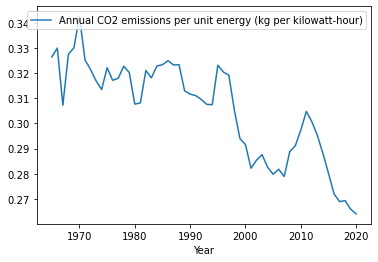

In [20]:
# China
China = test[test['Entity'] == 'China']
China.plot(x = 'Year', y = 'Annual CO2 emissions per unit energy (kg per kilowatt-hour)')

<AxesSubplot:xlabel='Year'>

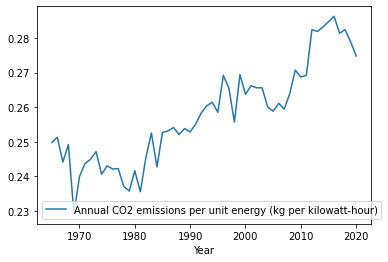

In [21]:
# India
India = test[test['Entity'] == 'India']
India.plot(x = 'Year', y = 'Annual CO2 emissions per unit energy (kg per kilowatt-hour)')